In [2]:
import pandas as pd
import os
import numpy as np

os.chdir('/root/arrow-private/cpp/Learn-to-Compress/data')
print(os.getcwd())
df = pd.read_csv('./ml_timestamp.csv', header=None)

/root/arrow-private/cpp/Learn-to-Compress/data


In [3]:
data = df.to_numpy().flatten().astype('uint64')

In [9]:
print(data)
print(data[len(data) - 1])
gap = data[len(data) - 1] - data[0] + 30 # 30 is a random number
data2 = data + gap
print(data2[0])

[1493733882409 1493733882455 1493733882500 ... 1493829248245 1493829248270
 1493829248294]
1493829248294
1493829248324.0


In [14]:
data_list = [data, data2]
test = np.concatenate(data_list, axis=0)
print(len(test))

28115130


In [16]:
data_len = len(data)
iterations = 200 * 1000 * 1000 / data_len
data_list = [data]
for i in range(int(iterations)):
    data_list.append(data + gap)
res = np.concatenate(data_list, axis=0)
res = res[0:200 * 1000 * 1000].astype('uint64')
assert len(res) == 200 * 1000 * 1000
pd.DataFrame(res).to_csv("ml_timestamp_200M.csv", header=None, index=False)

In [18]:
print(hex(res[0]))
print(hex(res[len(res) - 1]))

0x15bc97a3a29
0x15bd044b0ec


In [3]:
res = pd.read_csv('ml_timestamp_200M.csv', header=None).to_numpy().flatten().astype('uint64')


In [7]:
print(hex(res[0].astype('uint32') & 0x7fffffff))

0x497a3a29


In [8]:
print(len(res))

200000000


In [10]:
truncated_res = []
for val in res:
    truncated_res.append(val.astype('uint32') & 0x7fffffff)
truncated_res = np.array(truncated_res)
pd.DataFrame(truncated_res).to_csv("ml_timestamp_200M_int32.csv", header=None, index=False)

KeyboardInterrupt: 

In [4]:
truncated_res = res & 0x7fffffff

In [5]:
print(hex(truncated_res[0]))
print(len(truncated_res))

0x497a3a29
200000000


In [6]:
pd.DataFrame(truncated_res).to_csv("ml_timestamp_200M_int32.csv", header=None, index=False)

In [7]:
res = pd.read_csv('poisson_timestamps_EVENT_50000_SENSOR_2000_randomdie_OUTER_1000s_INNER_2ms_200M.csv', header=None).to_numpy().flatten().astype('uint64')


In [13]:
print(hex(res[0].astype('uint64')))
print(hex(res[len(res)-1].astype('uint64')))
print(hex(res[len(res)-1].astype('uint32')))

0xe8d49cb3d0
0x1960f9bf766c363
0xf766c363


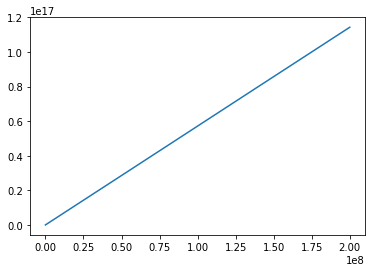

In [11]:
import matplotlib.pyplot as plt
plt.plot(res)